# Проект "Статистический анализ данных"

## Определение перспективного тарифа для телеком компании

В нашем распоряжении данные 500 пользователей «Мегалайна» (федерального оператора сотовой связи): кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов.  Целью нашего проекта будет сделать вывод — какой тариф лучше. Ниже приводится описание обоих тарифов.

## Описание тарифов

<b>Тариф «Смарт»</b>

Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей

<b>Тариф «Ультра»</b>

Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

### Шаг 1. Откройте файл с данными и изучите общую информацию

Откроем поочерёдно наши файлы и посмотрим информацию о них.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math
import matplotlib.pyplot as plt
calls = pd.read_csv('/datasets/calls.csv')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [2]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


`calls` содержит информацию о звонках:
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

In [3]:
internet = pd.read_csv('/datasets/internet.csv')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [4]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


`internet` содержит информацию об интернет-сессиях:
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

In [5]:
messages = pd.read_csv('/datasets/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


`messages` содержит информацию о сообщениях:
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

In [7]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


`tariffs` содержит информацию о тарифах:
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [9]:
users = pd.read_csv('/datasets/users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


`users` содержит информацию о пользователях:
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

Далее приведём данные к нужным типам и исправим ошибки в данных.

### Шаг 2. Подготовьте данные

В наших датафреймах столбцы с датами имеют тип `object`. Переведём их в `datetime64`. Для этого напишем цикл по датафреймам.

In [11]:
data_list = [calls, messages, internet, users]
 
for data in data_list:
    date_cols = [col for col in data.columns if 'date' in col]
    for col in date_cols:
        data[col] = pd.to_datetime(data[col])

В таблице `internet` видим столбец `Unnamed: 0`. Каких-то важных значений он в себе не несёт и отсутствует в описании к датафрейму. Удалим его.

Метод `read_csv()` по умолчанию сам создает колонку с индексами. В данном случае, колонка с индексами у нас уже имеется, и мы можем сразу сделать её индексом датафрейма, указав `index_col=0`. Тогда ничего удалять не придется.

In [12]:
internet = internet.drop(['Unnamed: 0'], axis=1)

In [13]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Так как «Мегалайн» всегда округляет вверх значения минут и мегабайтов, округлим столбец `mb_used` в датафрейме `internet` и заменим тип данных на `int64`. 

In [14]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

In [15]:
internet['mb_used'] = internet['mb_used'].astype('int64')
internet['mb_used'].head()

0     113
1    1053
2    1198
3     551
4     303
Name: mb_used, dtype: int64

Минуты в столбце `duration` датафрейма `calls` также округлим вверх и заменим тип данных на `int64`.

In [16]:
calls['duration'] = calls['duration'].apply(np.ceil)

In [17]:
calls['duration'] = calls['duration'].astype('int64')
calls['duration'].head()

0     0
1     0
2     3
3    14
4     6
Name: duration, dtype: int64

Нули в этом столбце могут означать пропущенные звонки. Значит, плата за них не взимается и мы можем избавиться от этих значений. Но пока этого делать не будем, т.к. сейчас непонятно, как отсутствие этих значений повлияет на результаты анализа.

В столбце `churn_date` датафрейма `users` есть много пропущенных значений. Это означает, что на момент выгрузки данных тариф ещё действовал, поэтому оставим их как есть.

Посчитаем для каждого пользователя количество израсходованных минут разговора по месяцам. Для начала добавим столбец `month` в датафрейм `calls`. Затем создадим сводную таблицу.

In [18]:
calls['month'] = calls['call_date'].dt.month
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [19]:
calls_group = calls.groupby(['user_id', 'month']).agg({'duration' : ['sum', 'count']})

In [20]:
calls_group = calls_group.reset_index()

In [21]:
calls_group.columns = ['user_id', 'month', 'duration_sum', 'duration_count']

In [22]:
calls_group.head()

,user_id,month,duration_sum,duration_count
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


Посчитаем для каждого пользователя количество отправленных сообщений по месяцам. Добавим столбец `month` в датафрейм `messages`, а затем создадим сводную таблицу.

In [23]:
messages['month'] = messages['message_date'].dt.month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [24]:
messages_group = messages.groupby(['user_id', 'month']).agg({'id' : ['count']})

In [25]:
messages_group = messages_group.reset_index()

In [26]:
messages_group.columns = ['user_id', 'month', 'messages_count']

In [27]:
messages_group.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам. Добавим столбец `month` в датафрейм `internet` и построим сводную таблицу.

In [28]:
internet['month'] = internet['session_date'].dt.month
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9


In [29]:
internet_group = internet.groupby(['user_id', 'month']).agg({'mb_used' : ['sum']})

In [30]:
internet_group = internet_group.reset_index()

In [31]:
internet_group.columns = ['user_id', 'month', 'mb_used_sum']

In [32]:
internet_group.head()

,user_id,month,mb_used_sum
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


Теперь последовательно соеденим таблицы `calls_group`, `messages_group`, `internet_group` и `users` в одну.

In [33]:
data = calls_group.merge(messages_group, on=['user_id', 'month'], how='outer')
data

,user_id,month,duration_sum,duration_count,messages_count
0,1000,5,159.0,22.0,22.0
1,1000,6,172.0,43.0,60.0
2,1000,7,340.0,47.0,75.0
3,1000,8,408.0,52.0,81.0
4,1000,9,466.0,58.0,57.0
...,...,...,...,...,...
3208,1489,8,NaN,NaN,17.0
3209,1489,9,NaN,NaN,32.0
3210,1489,10,NaN,NaN,21.0
3211,1489,11,NaN,NaN,20.0


In [34]:
data2 = data.merge(internet_group, on=['user_id', 'month'], how='outer')
data2

,user_id,month,duration_sum,duration_count,messages_count,mb_used_sum
0,1000,5,159.0,22.0,22.0,2256.0
1,1000,6,172.0,43.0,60.0,23257.0
2,1000,7,340.0,47.0,75.0,14016.0
3,1000,8,408.0,52.0,81.0,14070.0
4,1000,9,466.0,58.0,57.0,14581.0
...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17232.0
3210,1489,10,NaN,NaN,21.0,19588.0
3211,1489,11,NaN,NaN,20.0,17516.0
3212,1489,12,NaN,NaN,35.0,17341.0


In [35]:
final_data = data2.merge(users, on='user_id', how='outer')
final_data

,user_id,month,duration_sum,duration_count,messages_count,mb_used_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,159.0,22.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,172.0,43.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,340.0,47.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,408.0,52.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,466.0,58.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,NaN,21.0,19588.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11.0,NaN,NaN,20.0,17516.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3213,1489,12.0,NaN,NaN,35.0,17341.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


Посмотрим подробнее информацию о нашем новом датафрейме.

In [36]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 13 columns):
user_id           3216 non-null int64
month             3214 non-null float64
duration_sum      3174 non-null float64
duration_count    3174 non-null float64
messages_count    2717 non-null float64
mb_used_sum       3203 non-null float64
age               3216 non-null int64
churn_date        189 non-null datetime64[ns]
city              3216 non-null object
first_name        3216 non-null object
last_name         3216 non-null object
reg_date          3216 non-null datetime64[ns]
tariff            3216 non-null object
dtypes: datetime64[ns](2), float64(5), int64(2), object(4)
memory usage: 351.8+ KB


Избавимся от пропусков, заменим их нулями. В столбцах `duration_sum`, `duration_count`, `messages_count`, `mb_used_sum` есть пропуски скорее всего потому что в эти месяцы клиенты не использовали определённые виды услуг. Поэтому логично заменить пропуски здесь нулями. Нули в столбце `churn_date` будут означать, что тариф действовал на момент выгрузки данных и также заменят пропуски.

In [37]:
final_data = final_data.fillna(0)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 13 columns):
user_id           3216 non-null int64
month             3216 non-null float64
duration_sum      3216 non-null float64
duration_count    3216 non-null float64
messages_count    3216 non-null float64
mb_used_sum       3216 non-null float64
age               3216 non-null int64
churn_date        3216 non-null object
city              3216 non-null object
first_name        3216 non-null object
last_name         3216 non-null object
reg_date          3216 non-null datetime64[ns]
tariff            3216 non-null object
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 351.8+ KB


Заменим типы данных в столбцах `duration_sum`, `duration_count`, `messages_count`, `mb_used_sum` на `int`.

In [38]:
final_data['duration_sum'] = final_data['duration_sum'].astype('int64')
final_data['duration_count'] = final_data['duration_count'].astype('int64')
final_data['messages_count'] = final_data['messages_count'].astype('int64')
final_data['mb_used_sum'] = final_data['mb_used_sum'].astype('int64')

In [39]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 13 columns):
user_id           3216 non-null int64
month             3216 non-null float64
duration_sum      3216 non-null int64
duration_count    3216 non-null int64
messages_count    3216 non-null int64
mb_used_sum       3216 non-null int64
age               3216 non-null int64
churn_date        3216 non-null object
city              3216 non-null object
first_name        3216 non-null object
last_name         3216 non-null object
reg_date          3216 non-null datetime64[ns]
tariff            3216 non-null object
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory usage: 351.8+ KB


В двух последних строчках датафрейма практически отсутствует информация. Их удаление не повлияет на анализ, поэтому удалим их, а заодно избавимся от 2-х нулей в столбце `month`.

In [40]:
final_data = final_data.drop([3214,3215])
final_data

,user_id,month,duration_sum,duration_count,messages_count,mb_used_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,159,22,22,2256,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,172,43,60,23257,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,340,47,75,14016,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,408,52,81,14070,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,466,58,57,14581,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8.0,0,0,17,11066,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,1489,9.0,0,0,32,17232,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,1489,10.0,0,0,21,19588,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11.0,0,0,20,17516,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


Приведём столбец `month` к типу `int64`.

In [41]:
final_data['month'] = final_data['month'].astype('int64')
final_data['month'].head()

0    5
1    6
2    7
3    8
4    9
Name: month, dtype: int64

Посчитаем помесячную выручку с каждого пользователя. Для этого напишем функцию `month_payment_calculation` и добавим в таблицу новый столбец `revenue`.

In [42]:
def month_payment_calculation(row):
    
    minutes = row['duration_sum']
    messages = row['messages_count']
    internet = row['mb_used_sum']
    tariff = row['tariff']
 
    minutes_lim = tariffs[tariffs['tariff_name']== tariff]['minutes_included'].array[0] 
    minutes_rub =  tariffs[tariffs['tariff_name']== tariff]['rub_per_minute'].array[0] 
    mess_lim = tariffs[tariffs['tariff_name']== tariff]['messages_included'].array[0] 
    mess_rub = tariffs[tariffs['tariff_name']== tariff]['rub_per_message'].array[0] 
    inter_lim = tariffs[tariffs['tariff_name']== tariff]['mb_per_month_included'].array[0]
    inter_rub = tariffs[tariffs['tariff_name']== tariff]['rub_per_gb'].array[0]/1024
    tariff_per_month = tariffs[tariffs['tariff_name']== tariff]['rub_monthly_fee'].array[0]
 
 
 
    call_overlimit = max(minutes - minutes_lim, 0)
    mess_overlimit = max(messages - mess_lim, 0)
    internet_overlimit = max(internet - inter_lim, 0)
 
    call_overpay = call_overlimit * minutes_rub + mess_overlimit * mess_rub + internet_overlimit * inter_rub
    revenue = tariff_per_month + call_overpay 
 
    return  revenue
 
final_data['revenue'] = final_data.apply(month_payment_calculation, axis = 1)

In [43]:
final_data.head(10)

,user_id,month,duration_sum,duration_count,messages_count,mb_used_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue
0,1000,5,159,22,22,2256,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.00000
1,1000,6,172,43,60,23257,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.00000
2,1000,7,340,47,75,14016,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.00000
3,1000,8,408,52,81,14070,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.00000
4,1000,9,466,58,57,14581,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.00000
5,1000,10,350,57,73,14717,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.00000
6,1000,11,338,43,58,14768,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.00000
7,1000,12,333,46,70,9827,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.00000
8,1001,11,430,59,0,18452,41,0,Москва,Иван,Ежов,2018-11-01,smart,1153.90625
9,1001,12,414,63,0,14053,41,0,Москва,Иван,Ежов,2018-11-01,smart,550.00000


### Вывод

Мы подготовили наши данные к анализу: привели их к нужным типам, нашли и исправили ошибки.

Также мы посчитали для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя.

### Шаг 3. Проанализируйте данные

Теперь опишем поведение клиентов оператора, исходя из выборки. Для начала построим таблицы `minutes`, `sms` и `mb`, где посчитаем среднее количество, дисперсию и среднее отклонение соответствующих значений в зависимости от трафика и месяца.

In [44]:
minutes = final_data.groupby(['tariff', 'month'])['duration_sum'].agg({'duration' : ['mean', 'median', 'var', 'std']})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [45]:
minutes = minutes.reset_index()
minutes.columns = ['tariff', 'month', 'mean', 'median', 'var', 'std']
minutes

,tariff,month,mean,median,var,std
0,smart,1,203.852941,162.5,23787.341355,154.231454
1,smart,2,298.689655,258.0,36412.287961,190.820041
2,smart,3,390.051948,409.0,36823.155161,191.893604
3,smart,4,367.133929,368.5,34778.207127,186.489161
4,smart,5,387.361702,433.0,34820.061094,186.601343
5,smart,6,395.640244,400.0,30742.918861,175.336587
6,smart,7,408.353234,414.0,32250.269602,179.583601
7,smart,8,421.468085,432.0,34793.583379,186.530382
8,smart,9,428.611538,435.0,33535.342723,183.126576
9,smart,10,426.136054,427.5,35392.336375,188.128510


In [46]:
sms = final_data.groupby(['tariff', 'month'])['messages_count'].agg({'messages_count' : ['mean', 'median', 'var', 'std']})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [47]:
sms = sms.reset_index()
sms.columns = ['tariff', 'month', 'mean', 'median', 'var', 'std']
sms

,tariff,month,mean,median,var,std
0,smart,1,18.235294,15.0,262.367201,16.197753
1,smart,2,24.086207,20.0,473.097701,21.750809
2,smart,3,31.857143,23.0,718.492481,26.804710
3,smart,4,30.741071,28.0,602.139559,24.538532
4,smart,5,33.773050,30.0,730.990983,27.036845
5,smart,6,33.402439,28.0,806.806374,28.404337
6,smart,7,33.751244,29.0,799.887811,28.282288
7,smart,8,33.638298,27.0,838.257501,28.952677
8,smart,9,33.638462,30.0,790.617820,28.117927
9,smart,10,33.765306,30.0,816.111966,28.567673


In [48]:
mb = final_data.groupby(['tariff', 'month'])['mb_used_sum'].agg({'mb_used_sum' : ['mean', 'median', 'var', 'std']})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [49]:
mb = mb.reset_index()
mb.columns = ['tariff', 'month', 'mean', 'median', 'var', 'std']
mb

,tariff,month,mean,median,var,std
0,smart,1,8524.441176,7107.0,4.162621e+07,6451.837940
1,smart,2,11611.396552,12572.5,3.911935e+07,6254.546293
2,smart,3,15123.857143,15690.0,3.405260e+07,5835.460138
3,smart,4,13479.482143,14104.5,3.254736e+07,5705.029114
4,smart,5,15825.198582,16343.0,3.582236e+07,5985.177978
5,smart,6,15814.768293,16095.5,3.361642e+07,5797.966469
6,smart,7,15763.512438,15948.0,3.486110e+07,5904.328642
7,smart,8,16632.174468,16855.0,3.136352e+07,5600.314007
8,smart,9,16324.526923,16050.0,2.706215e+07,5202.129029
9,smart,10,16778.564626,17248.5,3.441711e+07,5866.609964


Построим график, который отобразит, сколько в среднем минут израсходуется пользователем в месяц по разным тарифам.

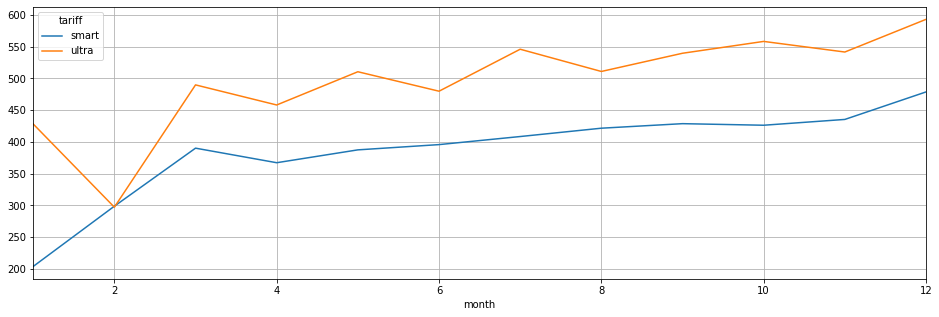

In [50]:
minutes.pivot_table(index='month', columns='tariff', values='mean').plot(figsize = (16, 5), grid=True)

В целом данные по тарифам похожи друг на друга (за исключением января и февраля, где расход минут по тарифу `smart` растёт, а по `ultra` падает), но в среднем по тарифу `ultra` расход больше. Это логично, учитывая, что в него включено в 6 раз больше бесплатных минут.

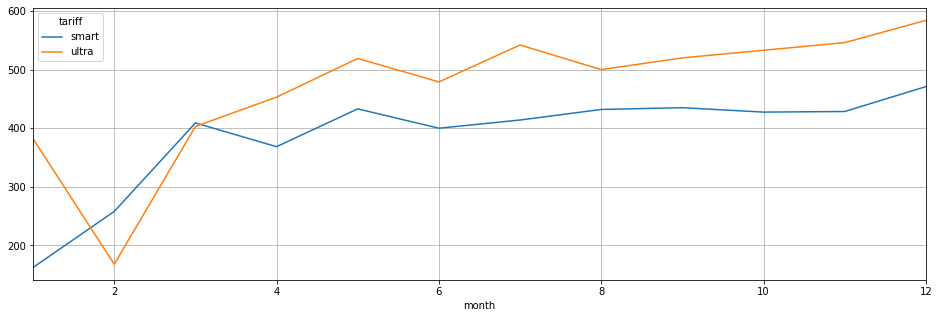

In [51]:
minutes.pivot_table(index='month', columns='tariff', values='median').plot(figsize = (16, 5), grid=True)

Медианные значения по своему характеру похожу на среднее.

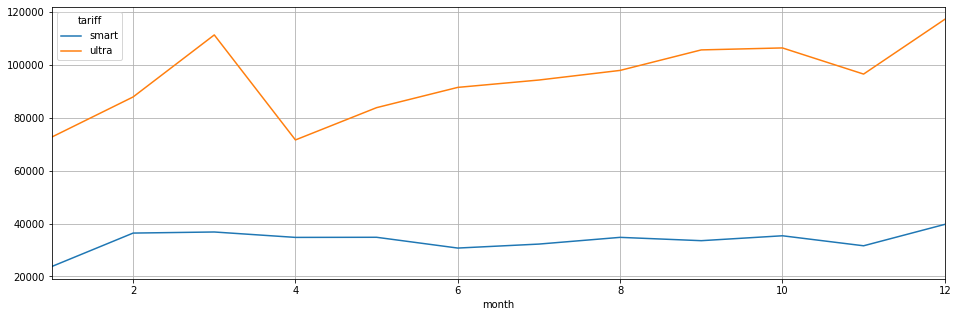

In [52]:
minutes.pivot_table(index='month', columns='tariff', values='var').plot(figsize = (16, 5), grid=True)

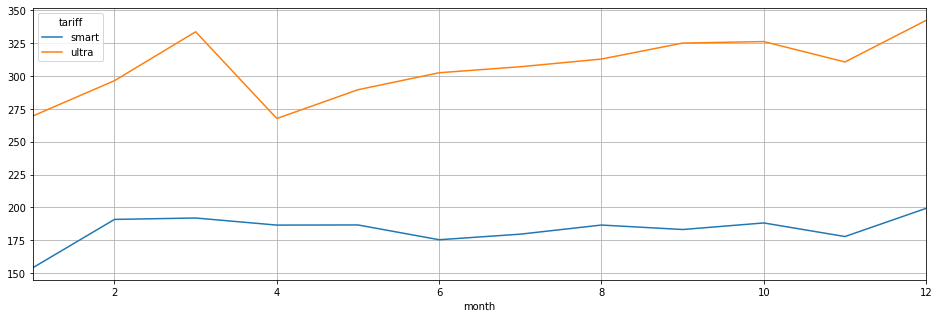

In [53]:
minutes.pivot_table(index='month', columns='tariff', values='std').plot(figsize = (16, 5), grid=True)

И дисперсия и стандартное отклонение намного выше в тарифе `ultra`.

Построим графики для таблицы `sms`.

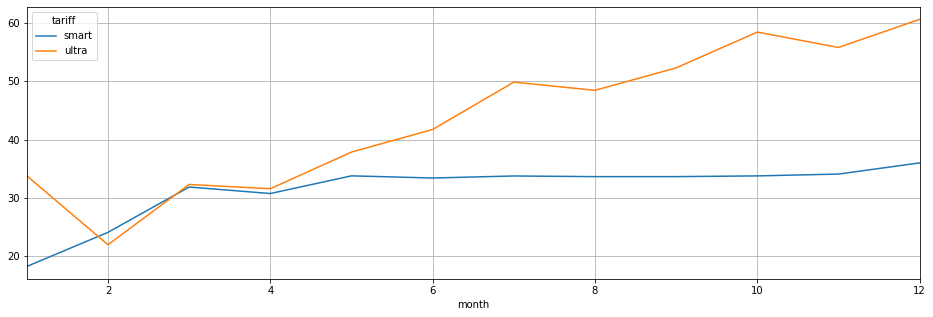

In [54]:
sms.pivot_table(index='month', columns='tariff', values='mean').plot(figsize = (16, 5), grid=True)

Похоже на ситуацию с минутами в начале года, но график более ровный до апреля. Затем количество отправленных смс в `ultra` возрастает, а в `smart` остаётся примерно на количестве 32-35 до конца года.

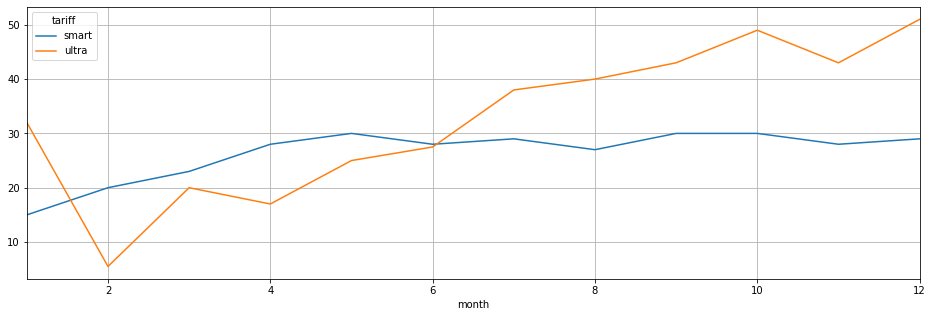

In [55]:
sms.pivot_table(index='month', columns='tariff', values='median').plot(figsize = (16, 5), grid=True)

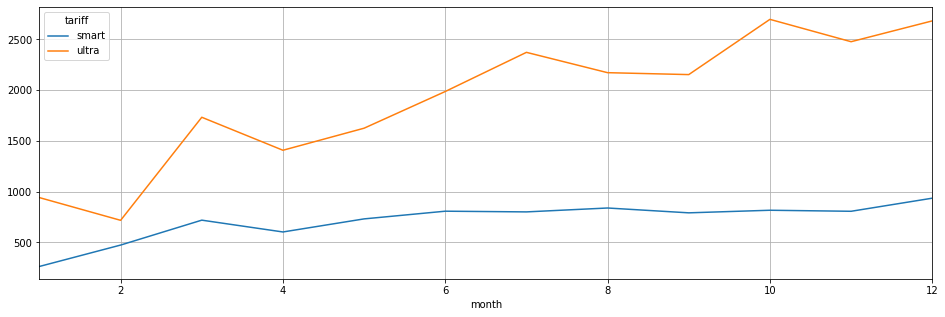

In [56]:
sms.pivot_table(index='month', columns='tariff', values='var').plot(figsize = (16, 5), grid=True)

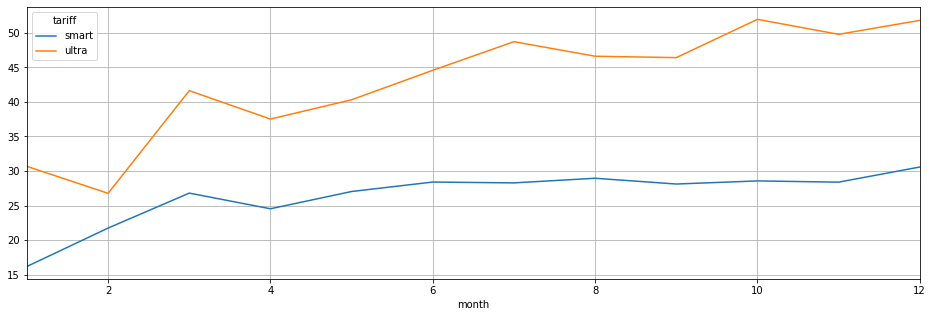

In [57]:
sms.pivot_table(index='month', columns='tariff', values='std').plot(figsize = (16, 5), grid=True)

Дисперсия и стандартное отклонение по тарифу `ultra` больше, как и в случае с минутами.

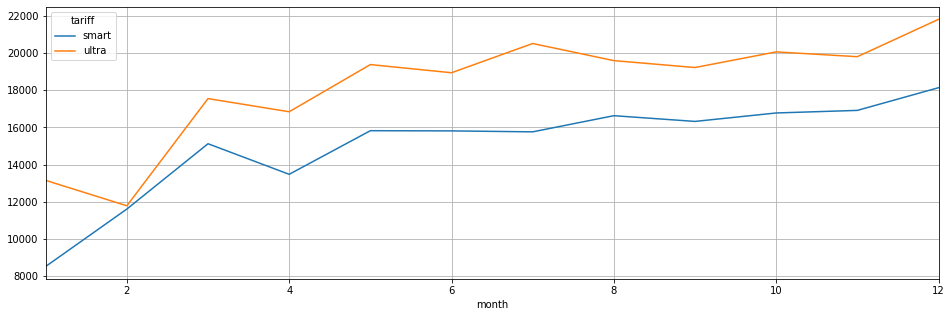

In [58]:
mb.pivot_table(index='month', columns='tariff', values='mean').plot(figsize = (16, 5), grid=True)

По расходу интернет-трафика видим похожую картину: расход по `ultra` падает к февралю, затем возрастает до конца года. По тарифу `smart` наблюдаем рост с января по март, и затем с апреля до конца года.

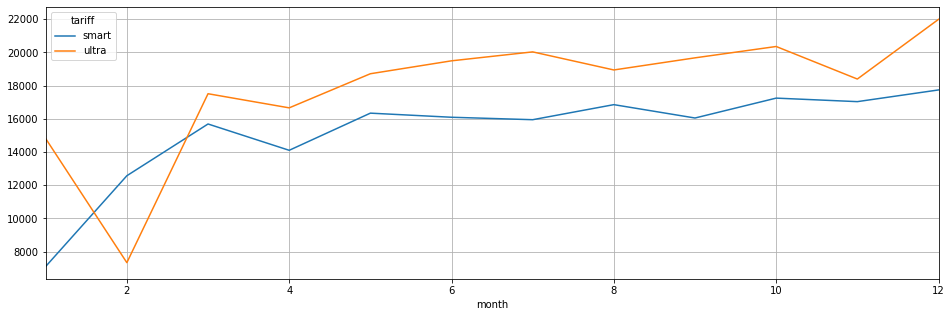

In [59]:
mb.pivot_table(index='month', columns='tariff', values='median').plot(figsize = (16, 5), grid=True)

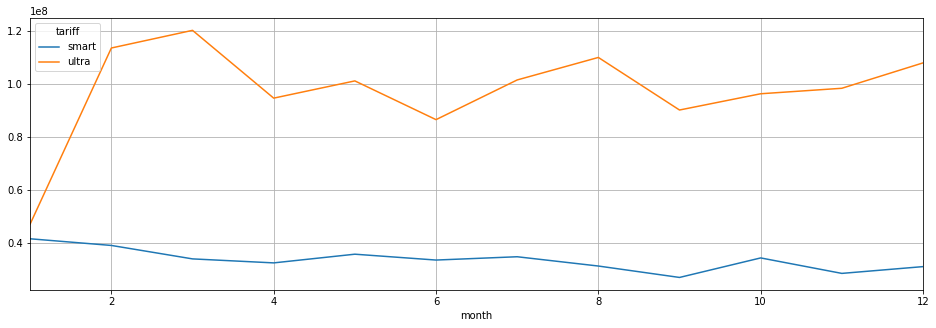

In [60]:
mb.pivot_table(index='month', columns='tariff', values='var').plot(figsize = (16, 5), grid=True)

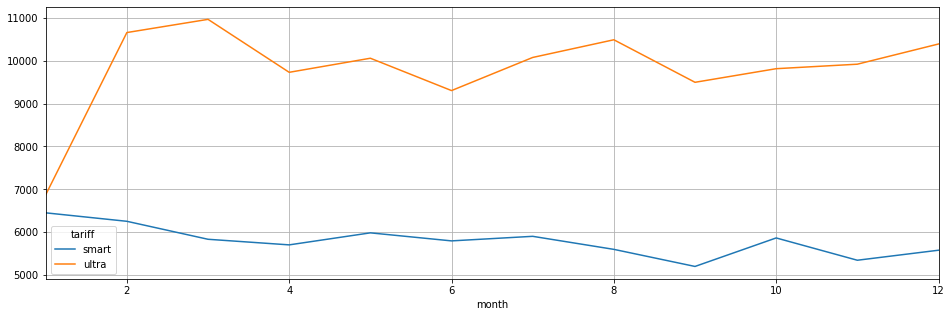

In [61]:
mb.pivot_table(index='month', columns='tariff', values='std').plot(figsize = (16, 5), grid=True)

In [62]:
minutes.query('tariff == "smart"')['mean'].mean()

386.76049870568664

In [63]:
minutes.query('tariff == "ultra"')['mean'].mean()

495.9343101624627

В среднем пользователи тарифа `ultra` тратят более чем на 100 минут больше, чем пользователи `smart`.

In [64]:
sms.query('tariff == "smart"')['mean'].mean()

31.413210661085547

In [65]:
sms.query('tariff == "ultra"')['mean'].mean()

43.71498284147191

Также пользователи `ultra` используют в среднем на 12 смс больше.

In [66]:
mb.query('tariff == "smart"')['mean'].mean()

15077.690651369858

In [67]:
mb.query('tariff == "ultra"')['mean'].mean()

18222.784561200377

Найдём также значения дисперсии и стандартного отклонения за весь год.

In [68]:
minutes_smart = minutes.query('tariff == "smart"')['mean']
minutes_smart_var = np.var(minutes_smart, ddof=1)
minutes_smart_var

5221.797220419809

In [69]:
minutes_ultra = minutes.query('tariff == "ultra"')['mean']
minutes_ultra_var = np.var(minutes_ultra, ddof=1)
minutes_ultra_var

5998.513625261545

In [70]:
sms_smart = sms.query('tariff == "smart"')['mean']
sms_smart_var = np.var(sms_smart, ddof=1)
sms_smart_var

26.0448270922888

In [71]:
sms_ultra = sms.query('tariff == "ultra"')['mean']
sms_ultra_var = np.var(sms_ultra, ddof=1)
sms_ultra_var

151.79398765605353

In [72]:
mb_smart = mb.query('tariff == "smart"')['mean']
mb_smart_var = np.var(mb_smart, ddof=1)
mb_smart_var

7154222.098659053

In [73]:
mb_ultra = mb.query('tariff == "ultra"')['mean']
mb_ultra_var = np.var(mb_ultra, ddof=1)
mb_ultra_var

8931620.906740498

Мы указываем параметр `ddof=1`, т.к. наш датасет - не генеральная совокупность, а выборка.

Рассчитаем стандартное отклонение.

In [74]:
minutes_smart = minutes.query('tariff == "smart"')['mean']
minutes_smart_std = np.std(minutes_smart, ddof=1)
minutes_smart_std

72.26200398840187

In [75]:
minutes_ultra = minutes.query('tariff == "ultra"')['mean']
minutes_ultra_std = np.std(minutes_ultra, ddof=1)
minutes_ultra_std

77.45007182218454

Стандартное отклонение можем рассчитать ещё и так:

In [76]:
sms_smart_std = np.sqrt(sms_smart_var)
sms_smart_std

5.103413278609601

In [77]:
sms_ultra_std = np.sqrt(sms_ultra_var)
sms_ultra_std

12.320470269273553

In [78]:
mb_smart_std = np.sqrt(mb_smart_var)
mb_smart_std

2674.737762596373

In [79]:
mb_ultra_std = np.sqrt(mb_ultra_var)
mb_ultra_std

2988.5817550705383

И в интернет пользователи `ultra` выходят активнее: в среднем в месяц на 3000 мегабайт.

Посмотрим также на среднюю выручку по разным тарифным планам.

In [80]:
final_data.query('tariff == "smart"')['revenue'].mean()

1233.3494665489009

In [81]:
final_data.query('tariff == "ultra"')['revenue'].mean()

2060.5299710501267

По тарифу `Ультра` выручка в среднем выше практически в 2 раза.

Построим гистограммы по всем записям для каждого тарифа, без агрегации по месяцам.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88df351350>,
      dtype=object)

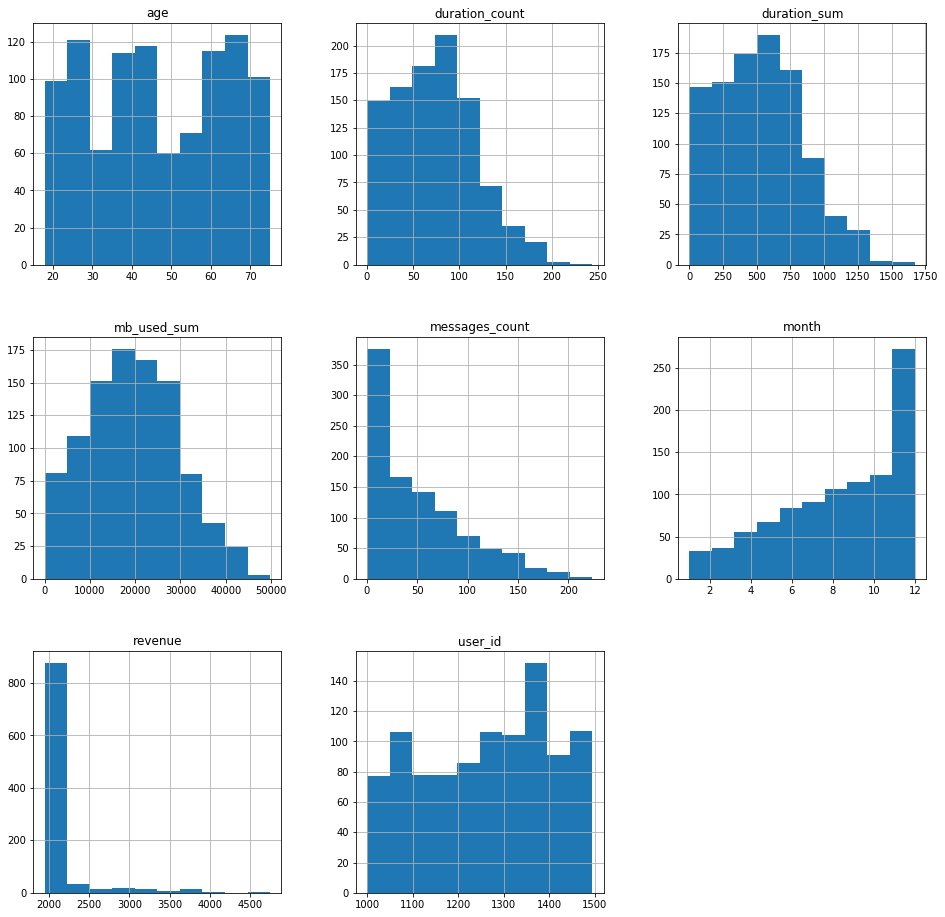

In [82]:
final_data.query('tariff == "ultra"').hist(figsize=(16, 16))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88df3a3250>,
      dtype=object)

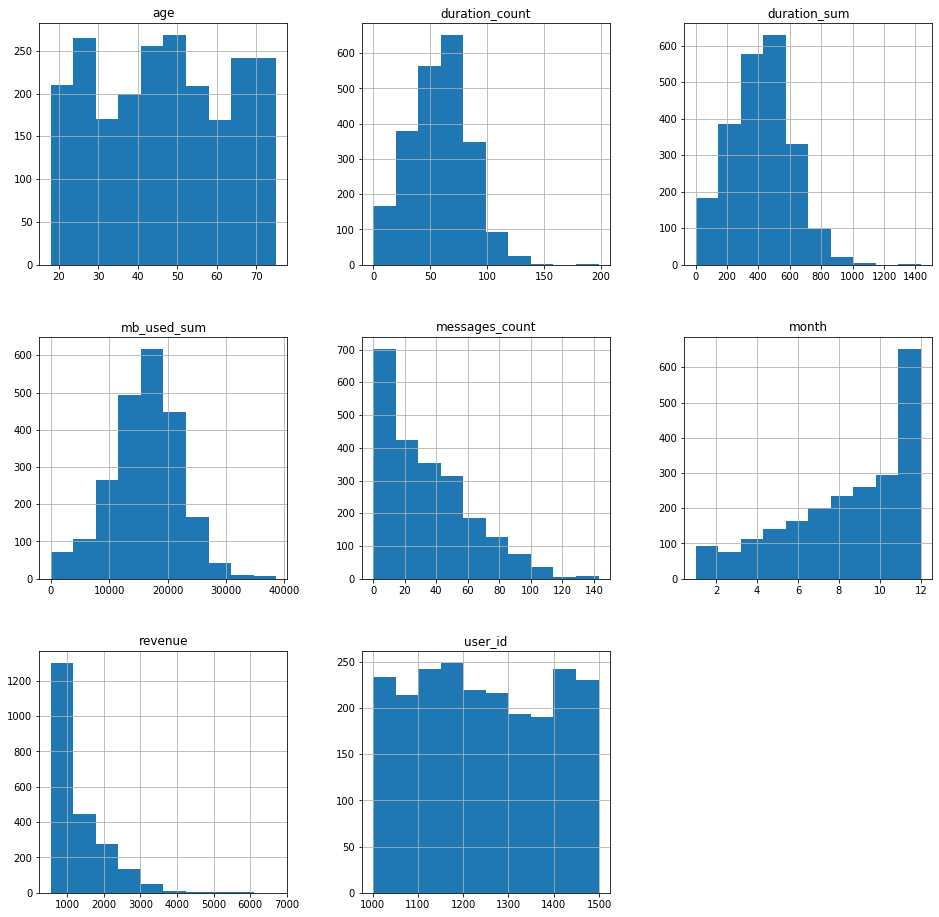

In [83]:
final_data.query('tariff == "smart"').hist(figsize=(16, 16))

Исходя из графиков, можно сделать следующие выводы:
* пользователям `ultra` хватает 3000 минут в месяц, а клиентам `smart` 500 минут мало, они часто выходят за пределы лимита;
* похожая ситуация с sms: пользователи `ultra` редко добираются и до цифры в 200 смс из 1000, включённых в лимит, в то время как клиентам `smart` зачастую требуется больше 50-ти имеющихся по тарифу;
* а вот интернет-трафика не хватает всем: клиентам обоих тарифов часто приходится выходить за рамки лимитов. Пользователи `ultra` в целом выходят чуть дальше, возможно, потому что последующие гигабайты стоят дешевле. 


### Вывод

В этом пункте мы выяснили, что пользователи тарифа `smart` тратят в среднем в месяц меньше минут, меньше смс и меньше интернет-трафика. 

Теперь проверим следующие гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Шаг 4. Проверьте гипотезы

Сначала проверим гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Так как выборки независимые, будем проверять с помощью функции `ttest_ind`, вычисляющую t-тест двух независимых выборок. 

Построим гистограммы по выручке для обоих тарифов.

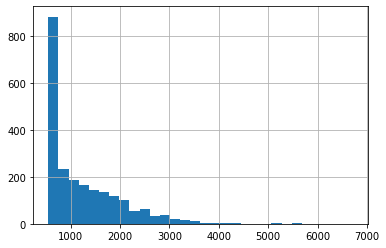

In [84]:
final_data.query('tariff == "smart"')['revenue'].hist(bins=30)

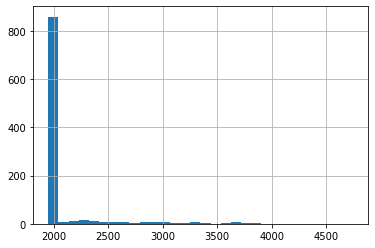

In [85]:
final_data.query('tariff == "ultra"')['revenue'].hist(bins=30)

Мы не наблюдаем здесь нормального распределения, оно необходимо для проведения `st.ttest_ind`. Но так как наша цель сейчас - усвоить основы проверки гипотез, мы его применим).


Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» НЕ различается.

Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

In [86]:
mean_revenue_smart = final_data.query('tariff == "smart"')['revenue']
mean_revenue_ultra = final_data.query('tariff == "ultra"')['revenue']

alpha = .05

results = st.ttest_ind(
    mean_revenue_smart, 
    mean_revenue_ultra)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.172655564462924e-190
Отвергаем нулевую гипотезу


В этом тесте мы отвергаем нулевую гипотезу, значит, средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Проверим ещё одну гипотезу: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Построим гистограммы.

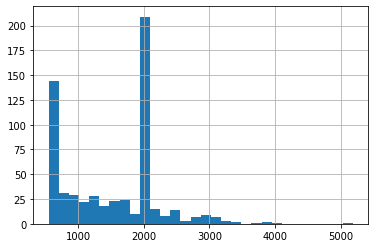

In [87]:
final_data.query('city == "Москва"')['revenue'].hist(bins=30)

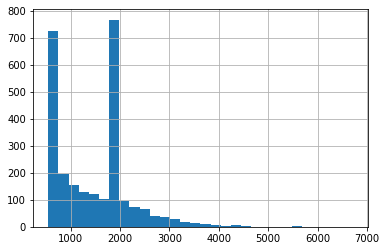

In [88]:
final_data.query('city != "Москва"')['revenue'].hist(bins=30)

Здесь также речи о нормальном распределении не идёт. 

Выдвинем 2 гипотезы.

Нулевая гипотеза: средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов.

Альтернативная гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [89]:
mean_revenue_moscow = final_data.query('city == "Москва"')['revenue']
mean_revenue_other = final_data.query('city != "Москва"')['revenue']

alpha = .05

results = st.ttest_ind(
    mean_revenue_moscow, 
    mean_revenue_other)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.47443187631524797
Не получилось отвергнуть нулевую гипотезу


Отвергнуть нулевую гипотезу не получилось, а это значит, что средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов.

### Вывод

По итогам проверок наших гипотез мы получили следующие результаты:

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
2. Средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов.

### Шаг 5. Напишите общий вывод

Мы подготовили и проанализировали наши данные из выборки, состоящей из 500 клиентов компани `Мегалайн`, а также проверили 2 гипотезы, основываясь на полученных данных.

Исходя из результатов анализа, в ходе которого выяснилось, что пользователи тарифа `Ультра` отправляют больше смс, тратят больше минут разговора и мегабайт интернет-трафика, мы можем сделать вывод, что данный тарифный план лучше, нежели тариф `Смарт`. Это также подтверждает и средняя выручка по тарифу `Ультра` - 2060 руб. (против 1233 руб. по тарифу `Смарт`).